## DESCRIPTION

### Objective: Make a model to predict the app rating, with other information about the app provided.

#### Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

#### Domain: General

#### Analysis to be done: The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. 

# The problem reduces to: predict which apps will have high ratings.

Content: Dataset: Google Play Store data (“googleplaystore.csv”)

Fields in the data –

App: Application name

Category: Category to which the app belongs 

Rating: Overall user rating of the app

Reviews: Number of user reviews for the app

Size: Size of the app

Installs: Number of user downloads/installs for the app

Type: Paid or Free

Price: Price of the app

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store

Current Ver: Current version of the app available on Play Store

Android Ver: Minimum required Android version

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df=pd.read_csv(r'C:\Users\PurvaRaut\Desktop\DataAnalytics\6.Python\Python Project\googleplaystore.csv')

In [3]:
#view the dataframe
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#view rows and columns of the dataframe
df.shape

(10841, 13)

In [5]:
#view information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
#check null
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#drop nulls
df.dropna(inplace=True)

In [8]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
df.shape

(9360, 13)

# Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [11]:
#check all columns in detail and get ready for Data cleaning
df['Android Ver'].tail()

10834            4.1 and up
10836            4.1 and up
10837            4.1 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, dtype: object

In [12]:
#convert 'Reviews' to int
df['Reviews']=pd.to_numeric(df['Reviews'])

In [13]:
#For 'Size' replace 'Varies with device' to blank, convert M to K and then entire col to integer (1 MB=1000KB)
df['Size'] = df['Size'].apply(lambda x :str(x).replace('Varies with device','')if 'Varies with device' in str(x) else x)

In [14]:
# In column 'Size' replace 'M' with a blank and also multiply it with 1000 to convert it to Kb values
df['Size'] = df['Size'].apply(lambda x : float(str(x).replace('M','')) * 1000 if 'M' in str(x) else x)

In [15]:
# In column 'Size' replace 'k' with a blank
df['Size'] = df['Size'].apply(lambda x :str(x).replace('k','')if 'k' in str(x) else x)

In [16]:
#Convert 'Size' column to numeric
df['Size']=pd.to_numeric(df['Size'])

In [17]:
#check for nulls in Size column
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [18]:
#drop nulls
df.dropna(axis=0,subset=['Size'],inplace=True)

In [19]:
#In 'Installs' remove ',','+',convert it to numeric

In [20]:
# In column 'Installs' replace '+' with a blank
df['Installs'] = df['Installs'].apply(lambda x :str(x).replace('+','')if '+' in str(x) else x)

In [21]:
# In column 'Installs' replace ',' with a blank
df['Installs'] = df['Installs'].apply(lambda x :str(x).replace(',','')if ',' in str(x) else x)

In [22]:
#Convert 'Installs' column to numeric
df['Installs']=pd.to_numeric(df['Installs'])

In [23]:
# In column 'Price' replace '$' with a blank
df['Price'] = df['Price'].apply(lambda x :str(x).replace('$','')if '$' in str(x) else x)

In [24]:
#Convert 'Price' column to numeric
df['Price']=pd.to_numeric(df['Price'])

In [25]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [26]:
df.shape

(7723, 13)

In [27]:
#df is now clean

# Sanity Checks

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   int64  
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 844.7+ KB


In [29]:
#Ratings can be between 1 and 5 only. 
#Lets check if any Ratings are beyond this range

In [30]:
df['Rating'].describe()

count    7723.000000
mean        4.173935
std         0.544638
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [31]:
# min is 1 and max is 5 so no further action is needed

In [32]:
#Reviews cannot be greater than Installs for an APP

In [33]:
df.query('Reviews > Installs')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [34]:
#Lets keep only the columns where Reviews < Installs

In [35]:
df.query('Reviews < Installs',inplace = True)

In [36]:
df.shape

(7715, 13)

In [37]:
#For 'Free' Apps the price should be '0'

In [38]:
df[(df.Type == 'Free') & (df.Price != 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [39]:
#none found so no further action needed.

# Exploratory Data Analysis

# Univariate Analysis

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7715 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7715 non-null   object 
 1   Category        7715 non-null   object 
 2   Rating          7715 non-null   float64
 3   Reviews         7715 non-null   int64  
 4   Size            7715 non-null   float64
 5   Installs        7715 non-null   int64  
 6   Type            7715 non-null   object 
 7   Price           7715 non-null   float64
 8   Content Rating  7715 non-null   object 
 9   Genres          7715 non-null   object 
 10  Last Updated    7715 non-null   object 
 11  Current Ver     7715 non-null   object 
 12  Android Ver     7715 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 843.8+ KB


In [41]:
df['Category'].nunique()

33

<AxesSubplot:xlabel='count', ylabel='Category'>

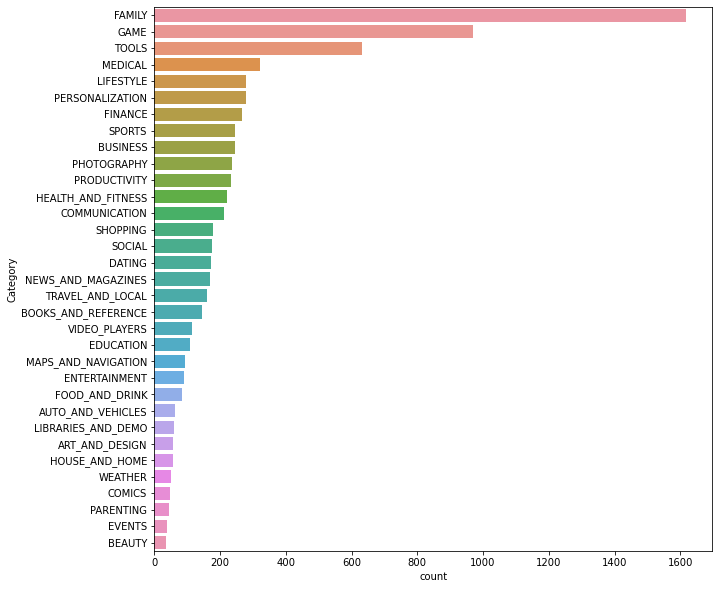

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, y='Category',order=df['Category'].value_counts().index)

In [43]:
#Maximum apps belong to Family Category and then Game Category

In [44]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7715.000000,7.715000e+03,7715.000000,7.715000e+03,7715.000000
mean,4.173104,2.952041e+05,22981.818859,8.432806e+06,1.129017
std,0.544305,1.864875e+06,23457.576548,5.018268e+07,17.417032
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.090000e+02,5300.000000,1.000000e+04,0.000000
50%,4.300000,2.359000e+03,14000.000000,1.000000e+05,0.000000
75%,4.500000,3.913100e+04,33000.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,100000.000000,1.000000e+09,400.000000


In [45]:
#Lets check price column

{'whiskers': [<matplotlib.lines.Line2D at 0x239b82195e0>,
 'caps': [<matplotlib.lines.Line2D at 0x239b8219bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x239b8219070>],
 'medians': [<matplotlib.lines.Line2D at 0x239b822d310>],
 'fliers': [<matplotlib.lines.Line2D at 0x239b822d6a0>],
 'means': []}

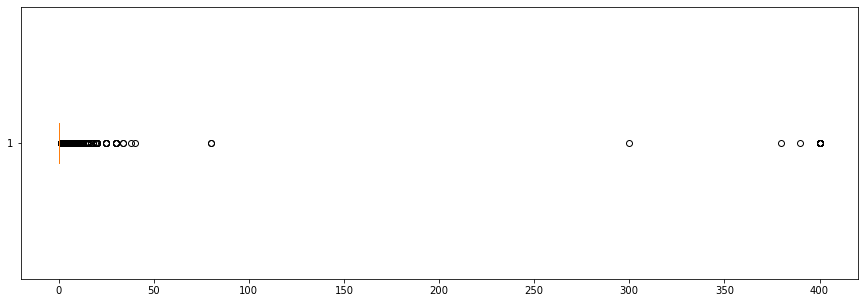

In [46]:
plt.figure(figsize= (15, 5))

plt.boxplot(df.Price, vert=False)

# Outlier treatment: 

## Price: From the box plot, it seems like there are some apps with very high price. A price  of $200 for an application on the Play Store is very high and suspicious!

## Check out the records with very high price

## Is 200 indeed a high price?

## Drop these as most seem to be junk apps

In [47]:
df.query('Price > 200')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [48]:
#Keep rows where price <=200
df.query('Price <= 200',inplace = True)

In [49]:
df.shape

(7700, 13)

In [50]:
#Lets check Reviews column

{'whiskers': [<matplotlib.lines.Line2D at 0x239b8297130>,
 'caps': [<matplotlib.lines.Line2D at 0x239b8297850>,
 'boxes': [<matplotlib.lines.Line2D at 0x239b8285dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x239b8297f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x239b82a1340>],
 'means': []}

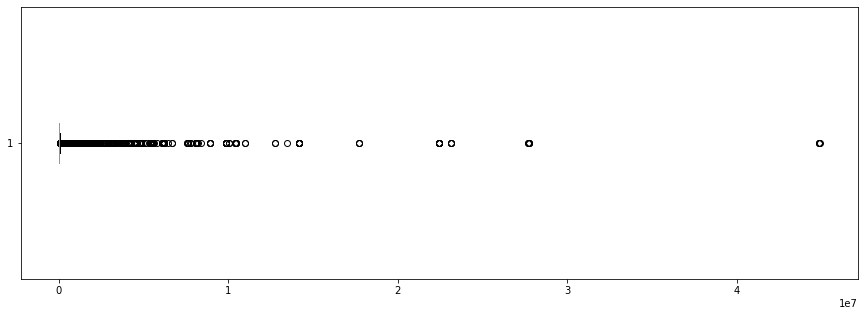

In [51]:
plt.figure(figsize= (15, 5))
plt.boxplot(df.Reviews, vert=False)
#very few apps have high reviews

# Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [52]:
df.query('Reviews > 2000000')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000.0,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300.0,100000000,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300,22000.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [53]:
#Keep rows where Reviews <=2000000
df.query('Reviews <= 2000000',inplace = True)

In [54]:
df.shape

(7481, 13)

In [55]:
#Lets check Installs column

{'whiskers': [<matplotlib.lines.Line2D at 0x239b82fe670>,
 'caps': [<matplotlib.lines.Line2D at 0x239b82fed90>,
 'boxes': [<matplotlib.lines.Line2D at 0x239b82fe2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x239b83094f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x239b8309880>],
 'means': []}

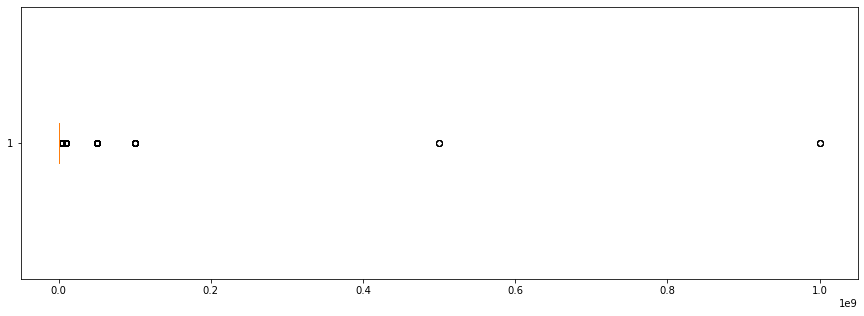

In [56]:
plt.figure(figsize= (15, 5))
plt.boxplot(df.Installs, vert=False)
#very few apps have high reviews

# Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

## Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

## Decide a threshold as cutoff for outlier and drop records having values more than that

In [57]:
#different percentile for Installs
df['Installs'].quantile([0.10, 0.25, 0.50, 0.70, 0.90, 0.95, 0.99])

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

In [58]:
#Threshold decided is 90%
Threshold = df.Installs.quantile(0.90)

In [59]:
Threshold

10000000.0

In [60]:
# check records above the threshold (Apps having very high number of installs)
df.query('Installs > 10000000')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
225,Secure Folder,BUSINESS,3.8,14760,8600.0,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11000.0,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10378,BMX Boy,GAME,4.2,839206,12000.0,50000000,Free,0.0,Everyone,Racing,"September 20, 2017",1.16.33,4.1 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.0,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.0,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.0,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up


In [61]:
#Keep rows where Installs <=10000000
df.query('Installs <= 10000000',inplace = True)

In [62]:
df.shape

(7305, 13)

# EDA Continued

# Histogram for Rating

## How are the ratings distributed? Is it more toward higher ratings?

(array([  17.,   18.,   39.,   72.,  131.,  407.,  768., 1383., 2892.,
        1578.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

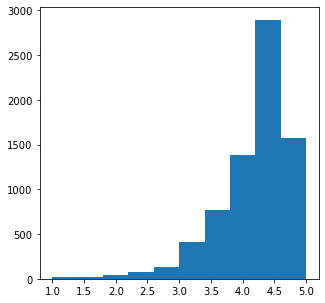

In [63]:
plt.figure(figsize= (5, 5))
plt.hist(df.Rating)
#frequency of rating is distributed towards high rating

# Histogram for Size

(array([3201., 1337.,  952.,  561.,  414.,  267.,  184.,  123.,  107.,
         159.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

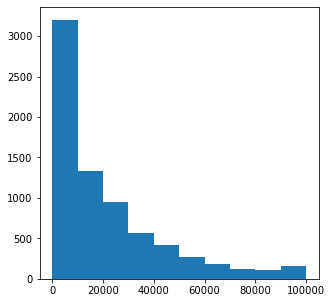

In [64]:
plt.figure(figsize= (5, 5))
plt.hist(df.Size)
##frequency of low size is high and gradually decreases as the size increases.

# Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7305 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7305 non-null   object 
 1   Category        7305 non-null   object 
 2   Rating          7305 non-null   float64
 3   Reviews         7305 non-null   int64  
 4   Size            7305 non-null   float64
 5   Installs        7305 non-null   int64  
 6   Type            7305 non-null   object 
 7   Price           7305 non-null   float64
 8   Content Rating  7305 non-null   object 
 9   Genres          7305 non-null   object 
 10  Last Updated    7305 non-null   object 
 11  Current Ver     7305 non-null   object 
 12  Android Ver     7305 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 799.0+ KB


<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

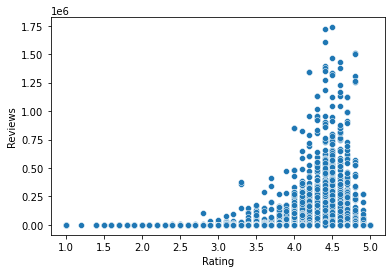

In [66]:
sns.scatterplot(x=df.Rating, y=df.Reviews)
#Rating seem to increase with the reviews

<AxesSubplot:xlabel='Rating', ylabel='Size'>

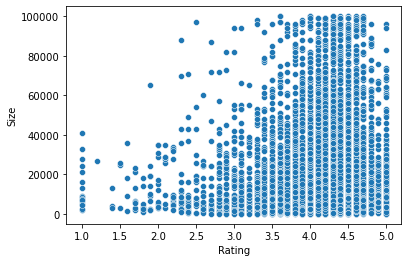

In [67]:
sns.scatterplot(x=df.Rating, y=df.Size)
#Rating seem to increase with the Size

<AxesSubplot:xlabel='Rating', ylabel='Installs'>

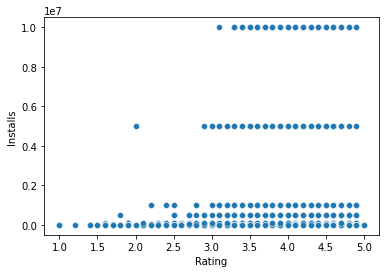

In [68]:
sns.scatterplot(x=df.Rating, y=df.Installs)
#A correlation between Rating and Installs is not observed

<AxesSubplot:xlabel='Rating', ylabel='Price'>

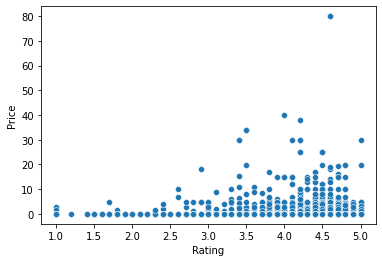

In [69]:
sns.scatterplot(x=df.Rating, y=df.Price)
#Rating does not seem to increase that much with the Price

In [70]:
df.rename(columns={'Content Rating': 'Content_Rating','Last Updated':'Last_Updated','Current Ver':'Current_Ver','Android Ver':'Android_Ver'}, inplace=True)

<AxesSubplot:xlabel='Rating', ylabel='Content_Rating'>

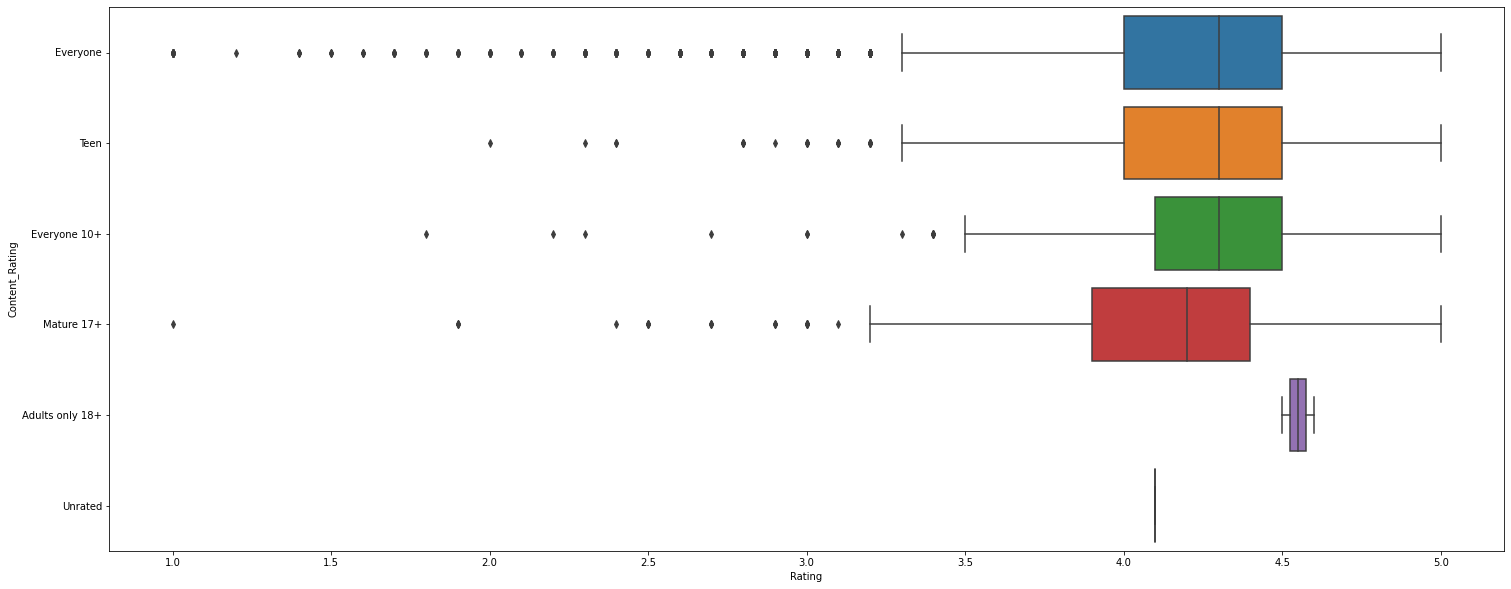

In [71]:
plt.figure(figsize = (25,10))
sns.boxplot(y = df.Content_Rating, x = df.Rating)
#Content rating for Adults 18+ are liked better

<AxesSubplot:xlabel='Rating', ylabel='Category'>

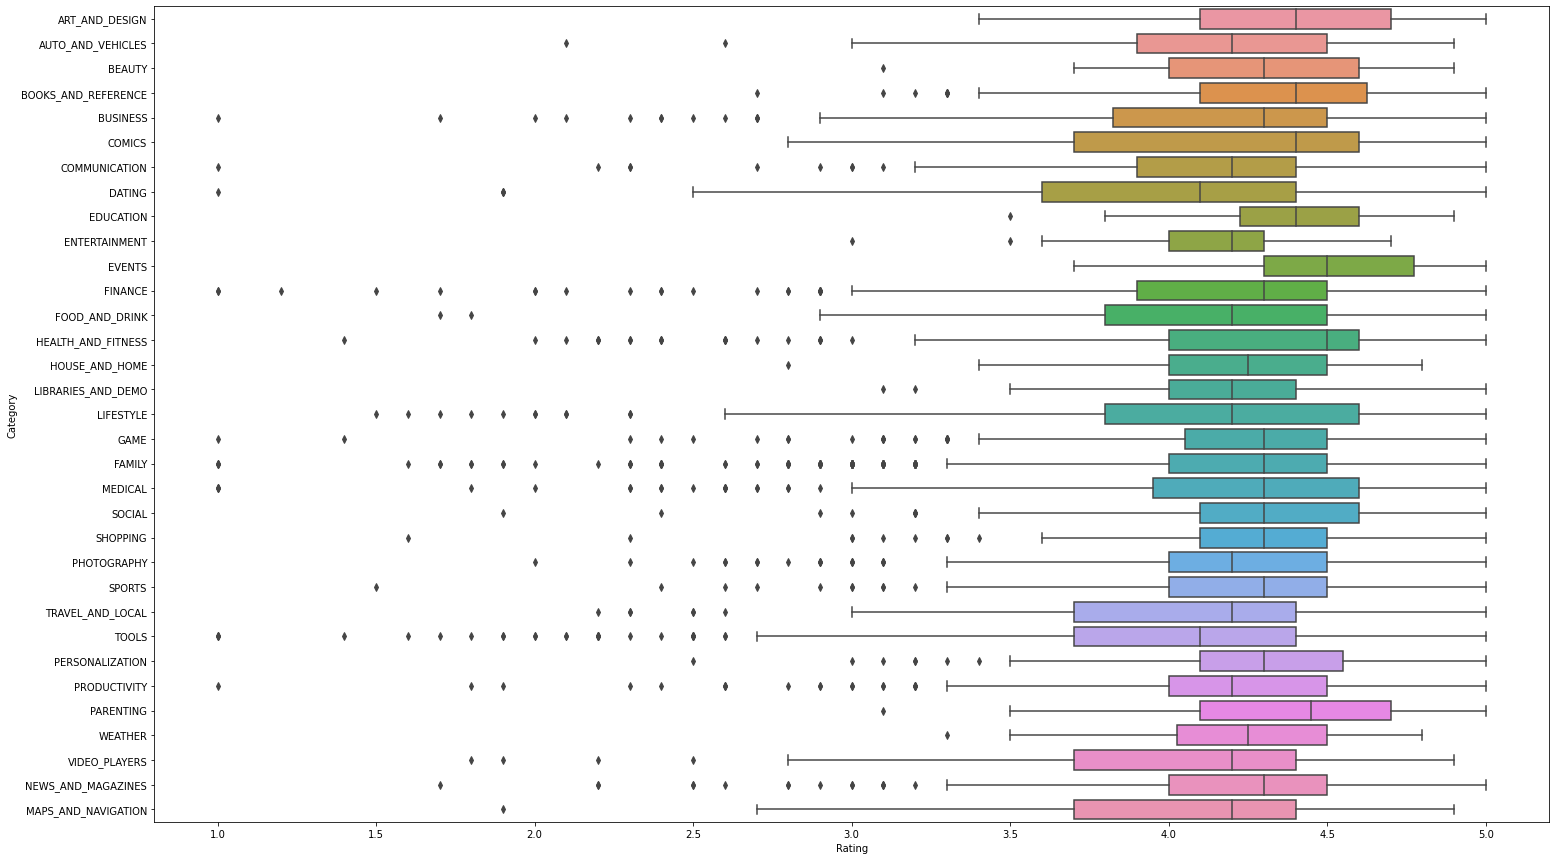

In [72]:
plt.figure(figsize = (25,15))
sns.boxplot(y = df.Category, x = df.Rating)

In [73]:
#Events,Parenting,Art and Design genre have better ratings

<AxesSubplot:xlabel='Rating', ylabel='Type'>

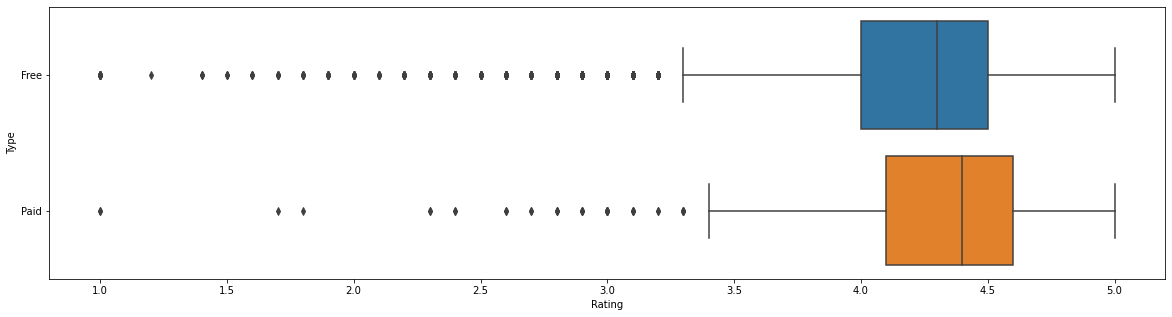

In [74]:
plt.figure(figsize = (20,5))
sns.boxplot(y = df.Type, x = df.Rating)

In [75]:
#Paid apps have slightly better rating

# Machine Learning- Building a model Using Linear Regression

In [76]:
#Lets make a copy of our dataframe

In [77]:
df1=df.copy()

In [78]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [79]:
df1.describe()

,Rating,Reviews,Size,Installs,Price
count,7305.000000,7.305000e+03,7305.000000,7.305000e+03,7305.000000
mean,4.162697,5.092503e+04,21692.945585,1.716479e+06,0.388845
std,0.555216,1.457582e+05,22461.886583,3.206291e+06,2.409480
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,9.100000e+01,5000.000000,1.000000e+04,0.000000
50%,4.300000,1.754000e+03,14000.000000,1.000000e+05,0.000000
75%,4.500000,2.756000e+04,30000.000000,1.000000e+06,0.000000
max,5.000000,1.736105e+06,100000.000000,1.000000e+07,79.990000


In [80]:
#we see that the reviews and installs have some values that are still relatively very high.
# Before building a linear regression model lets reduce the skew using log transformation (np.log1p) to Reviews and Installs.

In [81]:
# Log transformation to convert skew data into the normal distributed data
df1['Reviews'] = np.log1p(df1['Reviews'])

In [82]:
# Log transformation to convert skew data into the normal distributed data
df1['Installs'] = np.log1p(df1['Installs'])

In [83]:
df1.describe()

,Rating,Reviews,Size,Installs,Price
count,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000
mean,4.162697,7.350883,21692.945585,11.310735,0.388845
std,0.555216,3.393759,22461.886583,3.432663,2.409480
min,1.000000,0.693147,8.500000,1.791759,0.000000
25%,4.000000,4.521789,5000.000000,9.210440,0.000000
50%,4.300000,7.470224,14000.000000,11.512935,0.000000
75%,4.500000,10.224157,30000.000000,13.815512,0.000000
max,5.000000,14.367155,100000.000000,16.118096,79.990000


In [84]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [85]:
#Looks good now

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7305 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7305 non-null   object 
 1   Category        7305 non-null   object 
 2   Rating          7305 non-null   float64
 3   Reviews         7305 non-null   float64
 4   Size            7305 non-null   float64
 5   Installs        7305 non-null   float64
 6   Type            7305 non-null   object 
 7   Price           7305 non-null   float64
 8   Content_Rating  7305 non-null   object 
 9   Genres          7305 non-null   object 
 10  Last_Updated    7305 non-null   object 
 11  Current_Ver     7305 non-null   object 
 12  Android_Ver     7305 non-null   object 
dtypes: float64(5), object(8)
memory usage: 799.0+ KB


In [87]:
#Now lets drop unwanted columns from our dataframe
#we dont need 'App','Last_Updated','Current_Ver','Android_Ver',

In [88]:
df1.drop(columns = { 'App','Last_Updated','Current_Ver','Android_Ver',},inplace=True)

In [89]:
df1.shape

(7305, 9)

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7305 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        7305 non-null   object 
 1   Rating          7305 non-null   float64
 2   Reviews         7305 non-null   float64
 3   Size            7305 non-null   float64
 4   Installs        7305 non-null   float64
 5   Type            7305 non-null   object 
 6   Price           7305 non-null   float64
 7   Content_Rating  7305 non-null   object 
 8   Genres          7305 non-null   object 
dtypes: float64(5), object(4)
memory usage: 570.7+ KB


In [91]:
#Lets convert the categorical columns into numeric ones

In [92]:
cat_cols=['Category','Genres','Content_Rating','Type']

In [93]:
df1 = pd.get_dummies(df1,columns=cat_cols,drop_first=True)

In [94]:
df1

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated,Type_Paid
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,3.806662,619.0,6.908755,0.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
10834,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [95]:
df1.shape

(7305, 154)

## Create Input(X) and Output(y) Datasets

In [96]:
#df1 is our entire data
#before splitting the data into train and test datasets, lets first split it inti Input data and Output data
#Output dataset which in this case is 'Rating' contains predictions

X=df1.drop(columns=['Rating'])
y=df1['Rating']

#X is input dataset and y is output dataset

## Split data into training and tests sets

In [159]:
from sklearn.model_selection import train_test_split
#from sklearn library and module model_selection we import function called train_test_split
#train_test_split will split our dataset into 2 sets-1 for training and other for testing
#70% samples training, 30% samples testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [160]:
#Display the shape to check 70-30 split.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5113, 153)
(2192, 153)
(5113,)
(2192,)


# Model Building
## Linear Regression

In [161]:
from sklearn.linear_model import LinearRegression
#from sklearn package/library we have a module called linear_model import class LinearRegression.
#This class implements Linear regression algorithm

#Now lets create a new instance of the class
model = LinearRegression()

In [162]:
#Train the model-only pass the training dataset while training the model
model.fit(X_train, y_train)

LinearRegression()

## R2 Score of Training and Testing Dataset

In [163]:
from sklearn.metrics import r2_score

In [164]:
y_train_pred= model.predict(X_train)

In [165]:
# checking accuracy of the model train set r2 score
r2_train = round(r2_score(y_train, y_train_pred),3)
print("The R2 value of the Training Set is : {}".format(r2_train))

The R2 value of the Training Set is : 0.161


In [166]:
y_test_pred= model.predict(X_test)

In [167]:
# checking accuracy of the model test set r2 score
r2_test = round(r2_score(y_test, y_test_pred),3)
print("The R2 value of the Testing Set is : {}".format(r2_test))

The R2 value of the Testing Set is : 0.113


# Model Improvement